In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [102]:
fires = pd.read_csv('forest_fires.csv')

In [103]:
fires

,Day,Month,Year,Temp,Humidity,WindSpeed,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0


In [104]:
X = fires[["Temp"]]
y = fires[["FFMC"]]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 12)
X_train = X_train.drop([3])
y_train = y_train.drop([3])

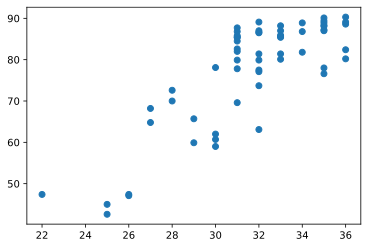

In [107]:
plt.scatter(np.reshape(X_train,(-1,1)), np.ravel(y_train))

In [108]:
len(y_train)

60

In [94]:
# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [98]:
y_train

array([[-1.22026132],
       [ 0.70564299],
       [ 0.54123652],
       [ 0.18110808],
       [ 0.34551454],
       [ 0.32985678],
       [ 0.75261627],
       [ 0.61169644],
       [ 0.88570721],
       [-0.59395098],
       [-2.36327771],
       [ 0.6273542 ],
       [-1.32203676],
       [ 0.72130075],
       [-0.03810055],
       [-1.0010527 ],
       [ 0.99531153],
       [ 0.72130075],
       [ 0.92485161],
       [ 0.86222058],
       [ 0.61169644],
       [-2.36327771],
       [-1.13414365],
       [-2.73906392],
       [-0.39040012],
       [ 0.73695851],
       [-0.00678503],
       [ 0.88570721],
       [ 0.83873394],
       [ 0.61169644],
       [ 0.64301196],
       [ 0.18110808],
       [-0.07724494],
       [-1.38466779],
       [ 0.19676583],
       [-0.6252665 ],
       [ 0.03235937],
       [ 0.73695851],
       [ 0.04018825],
       [ 0.90136497],
       [ 0.79176066],
       [-0.30428244],
       [-0.93059279],
       [ 0.73695851],
       [-2.55117081],
       [ 0

In [97]:
X_train

array([[-0.54567497],
       [ 0.10265173],
       [-0.22151162],
       [ 0.10265173],
       [-0.22151162],
       [ 0.75097842],
       [ 1.07514177],
       [-0.22151162],
       [ 1.07514177],
       [-1.19400167],
       [-3.13898175],
       [ 0.42681508],
       [-0.54567497],
       [ 0.75097842],
       [ 0.10265173],
       [-1.51816501],
       [ 1.39930512],
       [-0.22151162],
       [ 1.07514177],
       [ 1.39930512],
       [-0.22151162],
       [-1.84232836],
       [ 0.10265173],
       [-2.16649171],
       [-1.19400167],
       [ 1.07514177],
       [ 0.10265173],
       [ 0.75097842],
       [ 1.07514177],
       [ 0.42681508],
       [-0.22151162],
       [-0.22151162],
       [ 1.07514177],
       [-0.86983832],
       [ 0.42681508],
       [-0.22151162],
       [ 1.07514177],
       [ 0.10265173],
       [-0.54567497],
       [ 1.39930512],
       [-0.22151162],
       [ 0.10265173],
       [-0.86983832],
       [ 0.42681508],
       [-2.16649171],
       [ 0

In [76]:
eps = 1.1
svr_lin = SVR(kernel="linear", epsilon=eps)
svr_lin.fit(np.reshape(X_train,(-1,1)), np.ravel(y_train))

SVR(epsilon=1.1, kernel='linear')

In [77]:
svr_lin.coef_

array([[0.68423556]])

In [78]:
svr_lin.intercept_

array([-0.1566732])

Text(0, 0.5, 'Standardized FFMC')

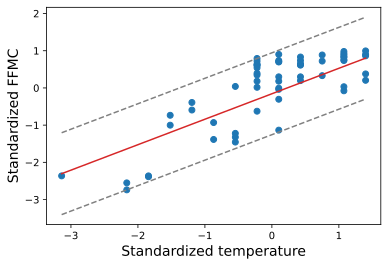

In [79]:
x_pred = np.linspace(X_train.min(), X_train.max(), num=100)
plt.scatter(np.reshape(X_train,(-1,1)), np.ravel(y_train))
plt.plot(x_pred,svr_lin.predict(np.reshape(x_pred,(-1,1))),label="linear", color="C3")
plt.plot(x_pred,svr_lin.predict(np.reshape(x_pred,(-1,1)))+eps, linestyle="dashed", color="grey")
plt.plot(x_pred,svr_lin.predict(np.reshape(x_pred,(-1,1)))-eps, linestyle="dashed", color="grey")
plt.xlabel('Standardized temperature', fontsize=14)
plt.ylabel('Standardized FFMC', fontsize=14)

In [86]:
svr_lin.predict(np.reshape([-2,3.5],(-1,1)))

array([-1.52514432,  2.23815126])

In [4]:
X = fires[["Temp"]]
y = fires[["FFMC"]]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.7, random_state = 12)
X_train = X_train.drop([3])
y_train = y_train.drop([3])
extra_x = pd.DataFrame([28,33], columns =["Temp"])
extra_y = pd.DataFrame([100,35], columns =["FFMC"])
X_train = pd.concat([X_train, extra_x])
y_train = pd.concat([y_train, extra_y])

In [5]:
eps = 10
svr_rbf = SVR(kernel="rbf", epsilon=eps)
svr_lin = SVR(kernel="linear", epsilon=eps)
svr_poly = SVR(kernel="poly", epsilon=eps)
svr_poly.fit(np.reshape(X_train,(-1,1)), np.ravel(y_train))
svr_lin.fit(np.reshape(X_train,(-1,1)), np.ravel(y_train))
svr_rbf.fit(np.reshape(X_train,(-1,1)), np.ravel(y_train))

SVR(epsilon=10)

(25.0, 108.0)

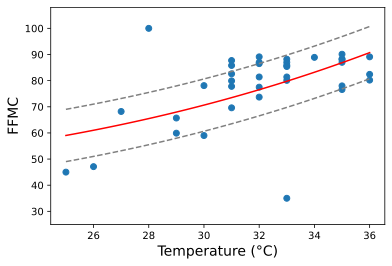

In [6]:
x_pred = np.linspace(X_train.min()[0], X_train.max()[0], num=100)
plt.scatter(np.reshape(X_train,(-1,1)), np.ravel(y_train))
#plt.plot(x_pred,svr_poly.predict(np.reshape(x_pred,(-1,1))))
#plt.plot(x_pred,svr_lin.predict(np.reshape(x_pred,(-1,1))))
plt.plot(x_pred,svr_poly.predict(np.reshape(x_pred,(-1,1))),label="poly", color="red")
#plt.plot(x_pred,svr_lin.predict(np.reshape(x_pred,(-1,1))),label="linear")
#plt.plot(x_pred,svr_rbf.predict(np.reshape(x_pred,(-1,1))),label="rbf")
plt.plot(x_pred,svr_poly.predict(np.reshape(x_pred,(-1,1)))+eps, linestyle="dashed", color="grey")
plt.plot(x_pred,svr_poly.predict(np.reshape(x_pred,(-1,1)))-eps, linestyle="dashed", color="grey")
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('FFMC', fontsize=14)
plt.ylim([25,108])

(25.0, 108.0)

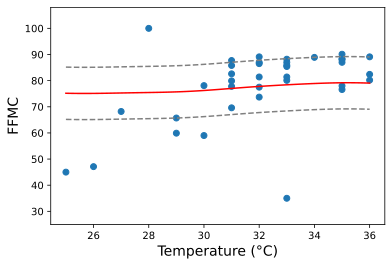

In [7]:
x_pred = np.linspace(X_train.min()[0], X_train.max()[0], num=100)
plt.scatter(np.reshape(X_train,(-1,1)), np.ravel(y_train))
#plt.plot(x_pred,svr_poly.predict(np.reshape(x_pred,(-1,1))))
#plt.plot(x_pred,svr_lin.predict(np.reshape(x_pred,(-1,1))))
plt.plot(x_pred,svr_rbf.predict(np.reshape(x_pred,(-1,1))),label="poly", color="red")
#plt.plot(x_pred,svr_lin.predict(np.reshape(x_pred,(-1,1))),label="linear")
#plt.plot(x_pred,svr_rbf.predict(np.reshape(x_pred,(-1,1))),label="rbf")
plt.plot(x_pred,svr_rbf.predict(np.reshape(x_pred,(-1,1)))+eps, linestyle="dashed", color="grey")
plt.plot(x_pred,svr_rbf.predict(np.reshape(x_pred,(-1,1)))-eps, linestyle="dashed", color="grey")
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('FFMC', fontsize=14)
plt.ylim([25,108])

In [112]:
len(svr_rbf.support_vectors_)

12

In [113]:
len(svr_poly.support_vectors_)

12